In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import pandas as pd
import statistics as stat
import scipy.stats as scistats
import matplotlib.mlab as mlab
from pathlib import Path

In [2]:
date = '2019-07-19' # // 2019-01-31 // 2018-12-07
micscp = 'DIC' #TIRF or DIC

p = 'E:\\Sofia\\'+date+'_'+micscp
path = Path(p)
path.exists()

True

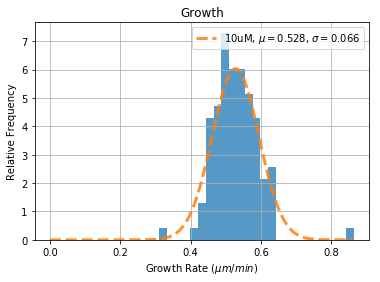

In [5]:
data = pd.read_csv(path/(date+'_growth.csv'),sep=',');

muG = []
sigmaG = []
conc = []
legnd = []

title = ('Growth')
xlables = ('Growth Rate ' r'$(\mu m / min)$')
plt.ylabel('Relative Frequency')
plt.xlabel(xlables)
plt.title(title);
for i in list(data):#['6']:#list(data):
    datos = data[i].dropna()
    (mu0, sigma0) = scistats.norm.fit(datos)
    n, bins, patches = plt.hist(datos, 25, density=True, alpha=0.75);
    x = np.linspace(0, bins[-1], 100)
    plt.plot(x, scistats.norm.pdf(x,mu0,sigma0),'--', lw=3, alpha=0.85)
    muG = muG+ [mu0]
    sigmaG = sigmaG+ [sigma0]
    conc = conc+ [float(i)]
    legnd = legnd + [i+'uM, '+r'$\mu =$'+ str(round(mu0,3))+r', $\sigma =$'+ str(round(sigma0,3))]

plt.legend(legnd,loc='upper right')
plt.grid(True)
plt.savefig(path/(date+'_histogramsGfit.png'))
plt.show()


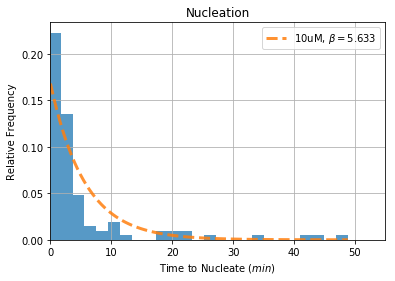

-0.30723246


In [7]:
data = pd.read_csv(path/(date+'_time2nuc.csv'),sep=',');

scaleN = []
legnd = []

title = ('Nucleation')
xlables = ('Time to Nucleate ' r'$(min)$')
plt.ylabel('Relative Frequency')
plt.xlabel(xlables)
plt.title(title);
for i in list(data):#list(data):
    datos = data[i].dropna()
    (loc0, scale0) = scistats.expon.fit(datos)
    n, bins, patches = plt.hist(datos, 25, density=True, alpha=0.75);
    x = np.linspace(0, bins[-1], 100)
    plt.plot(x, scistats.expon.pdf(x,loc0,scale0),'--', lw=3, alpha=0.85)
    scaleN = scaleN + [scale0]
    legnd = legnd + [i+'uM, '+r'$\beta =$'+ str(round(scale0,3))]

plt.legend(legnd,loc='upper right')
plt.grid(True)
plt.xlim([0,55])
plt.savefig(path/(date+'_histogramsNfit.png'))
plt.show()
 
muN = scaleN
sigmaN = scaleN

print(loc0)

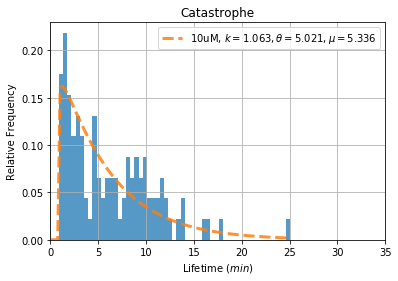

In [8]:
data = pd.read_csv(path/(date+'_lifetime.csv'),sep=',');

shapeC = []
scaleC = []
legnd = []

title = ('Catastrophe')
xlables = ('Lifetime ' r'$(min)$')
plt.ylabel('Relative Frequency')
plt.xlabel(xlables)
plt.title(title);
for i in list(data): #list(data):#
    datos = data[i].dropna()
    (shape0, loc0 , scale0) = scistats.gamma.fit(datos)
    n, bins, patches = plt.hist(datos, 55, density=True, alpha=0.75);
    x = np.linspace(0, bins[-1], 100)
    plt.plot(x, scistats.gamma.pdf(x, shape0, loc0, scale0),'--', lw=3, alpha=0.85)
    scaleC = scaleC + [scale0]
    shapeC = shapeC + [shape0]
    legnd = legnd + [i+'uM, '+r'$k =$'+ str(round(shape0,3))+r'$, \theta =$'+ str(round(scale0,3))+r'$, \mu =$'+ str(round(scale0*shape0,3))]

plt.legend(legnd,loc='upper right')
plt.grid(True)
plt.savefig(path/(date+'_histogramsCfit.png'))
plt.xlim([0,35])
plt.show()

muC = np.multiply(shapeC,scaleC)
sigmaC = np.multiply(np.sqrt(shapeC),scaleC)



C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: Matplotlib

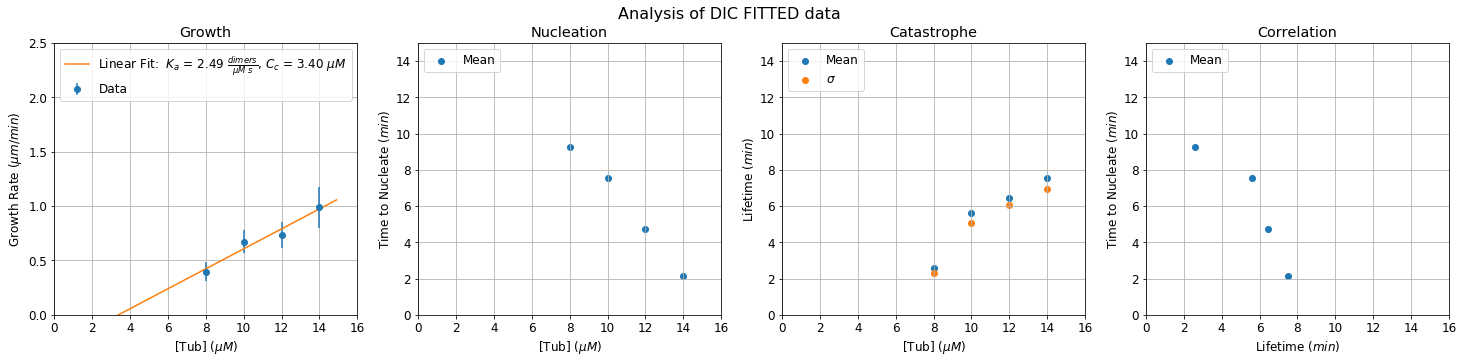

In [11]:
titles = ('Growth','Nucleation','Catastrophe','Correlation')
ylables = ('Growth Rate ' r'$(\mu m / min)$','Time to Nucleate ' r'$(min)$','Lifetime ' r'$(min)$','Time to Nucleate ' r'$(min)$')

a1 , a0 = np.polyfit(conc, muG, 1)
y_int = -a0/a1
x_range = np.arange(0,15,0.1)
 
plt.figure(figsize=(25,5))
plt.suptitle('Analysis of '+micscp+' FITTED data', fontsize=16)

plt.subplot(1,4,1)
plt.errorbar(conc, muG, yerr=sigmaG, fmt='o')
plt.plot(x_range, a1*x_range+a0)
plt.ylim(0,2.5)
plt.legend(('Linear Fit:  'r'$K_a$'' = %.2f 'r'$\frac{dimers}{\mu M \; s}$'', 'r'$C_c$'' = %.2f 'r'$\mu M$' %(a1*27.1, y_int),'Data'),loc='upper left')

plt.subplot(1,4,2)
plt.scatter(conc, muN)
plt.ylim(0,15)
plt.legend(( 'Mean',r'$\sigma$'),loc='upper left')

plt.subplot(1,4,3)
plt.scatter(conc, muC)
plt.scatter(conc, sigmaC)
plt.ylim(0,15)
plt.legend(('Mean', r'$\sigma$'),loc='upper left')

plt.subplot(1,4,4)
plt.scatter(muC, muN)
plt.ylim(0,15)
plt.legend(('Mean', r'$\sigma$'),loc='upper left')


for i in [0,1,2,3] :
    plt.subplot(1,4,i+1)
    plt.xlabel('[Tub] ' r'$(\mu M)$')
    plt.ylabel(ylables[i])
    plt.title(titles[i]);
    plt.xlim(0,16)
    plt.grid(True)

plt.xlabel('Lifetime ' r'$(min)$') 
#plt.savefig(path/(date+'_graphs.pdf'))
plt.savefig(path/(date+'_graphsFit.png'))

ValueError: 'c' argument has 3 elements, which is not acceptable for use with 'x' with size 4, 'y' with size 4.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


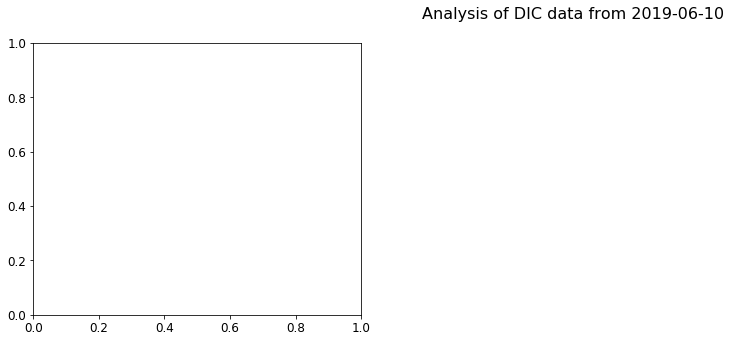

In [10]:
titles = ('Nucleation','Catastrophe', 'Correlation?')
ylables = ('Lag ' r'$(min)$','Lifetime ' r'$(min)$', 'Lag ' r'$(min)$')
xlables = ('[Tub] ' r'$(\mu M)$','[Tub] ' r'$(\mu M)$','Lifetime ' r'$(min)$')

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12}
plt.rc('font', **font)

plt.figure(figsize=(20,5))
plt.suptitle('Analysis of '+micscp+' data from '+date, fontsize=16)

plt.subplot(1,3,1)
plt.scatter(conc, muN,c=['#1F77B4','#FF7F0E','#E60A85'],s=200)
plt.ylim(0,15)

plt.subplot(1,3,2)
plt.scatter(conc, muC,c=['#1F77B4','#FF7F0E','#E60A85'],s=200)
plt.ylim(0,15)

plt.subplot(1,3,3)
plt.scatter(muC, muN,c=['#1F77B4','#FF7F0E','#E60A85'],s=200)
plt.ylim(0,15)


for i in [0,1,2] :
    plt.subplot(1,3,i+1)
    plt.xlabel(xlables[i])
    plt.ylabel(ylables[i])
    plt.title(titles[i]);
    plt.legend(( 'Mean','S Dev'),loc='upper left')
    plt.xlim(0,16)
    plt.grid(True)
    
#plt.savefig(path/(date+'_graphs.pdf'))
plt.savefig(path/(date+'_graphsCorr.png'))